# SQL Project
You were hired by Ironhack to perform an Analytics Consulting Project entitled: competitive landscape.

Your mission is to create and populate an appropriate database with many coding schools that are our competition, as well as design an suitable queries that answer business questions of interest (to be defined by you)


**Suggested Steps in the Project:**


*   Read this notebook and understand each function. Comment the code appropriately

*   Populate the list of schools with a wider variety of schools (how are you going to get the school ID?)

* Take a look at the obtained dataframes. What dimensions do you have? what keys do you have? how could the different dataframes be connected?

* Go back to the drawing board and try to create an entity relationship diagram for tables available

* Once you have the schemas you want, you will need to:
  - create the suitable SQL queries to create the tables and populate them
  - run these queries using the appropriate Python connectors
  
* Bonus: How will this datamodel be updated in the future? Please write auxiliary functions that test the database for data quality issues. For example: how could you make sure you only include the most recent comments when you re-run the script?


# Suggested Deliverables

* 5-6 minute presentation of data model created, decision process and business analysis proposed

* exported .sql file with the final schema

* Supporting python files used to generate all logic

* High level documentation explaining tables designed and focusing on update methods

Crucial hint: check out the following tutorial:
https://www.dataquest.io/blog/sql-insert-tutorial/


In [73]:
# Import necessary libraries
import numpy as np
import re
import pandas as pd
from pandas.io.json import json_normalize
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import getpass
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Overall Analysis

In [2]:
# you must populate this dict with the schools required -> try talking to the teaching team about this


potential_schools ={
'ironhack' : 10828,
'app-academy' : 10525,
'springboard': 11035,
'general-assembly' : 10761,
'flatiron-school' : 10748,
'careerfoundry' : 10581,
'brainstation':10571,
'le-wagon':10868
}


def get_comments_school(school):
    TAG_RE = re.compile(r'<[^>]+>')
    # defines url to make api call to data -> dynamic with school if you want to scrape competition
    url = "https://www.switchup.org/chimera/v1/school-review-list?mainTemplate=school-review-list&path=%2Fbootcamps%2F" + school + "&isDataTarget=false&page=3&perPage=10000&simpleHtml=true&truncationLength=250"
    #makes get request and converts answer to json
    # url defines the page of all the information, request is made, and information is returned to data variable
    data = requests.get(url).json()
    #converts json to dataframe
    reviews =  pd.DataFrame(data['content']['reviews'])
  
    #aux function to apply regex and remove tags
    def remove_tags(x):
        return TAG_RE.sub('',x)
    reviews['review_body'] = reviews['body'].apply(remove_tags)
    reviews['school'] = school
    return reviews

In [3]:
#List comprehension

comments_potential = pd.concat([get_comments_school(potential_schools) for potential_schools in potential_schools.keys()])
comments_potential

,id,name,anonymous,hostProgramName,graduatingYear,isAlumni,jobTitle,tagline,body,rawBody,...,queryDate,program,user,overallScore,comments,overall,curriculum,jobSupport,review_body,school
0,306372,Sergio Burgos,False,None,2023.0,False,International Negotiator,The Most Intense Academic Challenge,"<span class=""truncatable""><p></p><p>After comp...",<p>After completing my Data Analytics Bootcamp...,...,2023-11-10,Data Analytics Bootcamp,{'image': None},3.3,[],3.0,3.0,4.0,After completing my Data Analytics Bootcamp wi...,ironhack
1,306215,Anonymous,True,None,2023.0,True,,Transformative Experience: My Time at Ironhack,"<span class=""truncatable""><p></p><p>Pros: 1)In...",<p>Pros: 1)Intensive Learning 2)Real-World Pro...,...,2023-11-06,Web Development Bootcamp,{'image': None},4.0,[],4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack
2,306068,Anonymous,True,None,2023.0,False,Full stack development,Now I can do it,"<span class=""truncatable""><p></p><p>7 months a...","<p>7 months ago, I only had an idea about html...",...,2023-10-31,None,{'image': None},5.0,[],5.0,5.0,5.0,"7 months ago, I only had an idea about html an...",ironhack
3,305297,Utku Cikmaz,False,None,2023.0,False,Full Stack Web Developer,It was good,"<span class=""truncatable""><p></p><p>The course...","<p>The course was great. Especially, Luis is a...",...,2023-10-02,Web Development Bootcamp,{'image': None},4.0,[],5.0,3.0,4.0,"The course was great. Especially, Luis is a gr...",ironhack
4,305278,Nirmal Hodge,False,None,2023.0,False,Product Designer,Ironhack 100% Worth It!,"<span class=""truncatable""><p></p><p>I joined t...",<p>I joined the UX/ UI Bootcamp and to be hone...,...,2023-09-30,UX/UI Design Bootcamp,{'image': None},5.0,[],5.0,5.0,5.0,I joined the UX/ UI Bootcamp and to be honest ...,ironhack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,231857,Baptiste H.,False,None,2014.0,True,Software Engineer,"I entered ""le Wagon"" program et I and found a ...","<span class=""truncatable""><p>I entered ""le Wag...","I entered ""le Wagon"" with my partner and we bo...",...,2014-10-17,None,{'image': None},5.0,[],5.0,5.0,5.0,"I entered ""le Wagon"" with my partner and we bo...",le-wagon
2727,231855,Mélanie Navarro,False,None,NaN,False,None,9 very intensive weeks and I recommend it to a...,"<span class=""truncatable""><p>The training exce...",The training exceeded my expectations:\r\n- Ma...,...,2014-10-16,None,{'image': None},5.0,[],5.0,5.0,5.0,The training exceeded my expectations:- Master...,le-wagon
2728,231853,Olivier Xu,False,None,2014.0,True,Co-founder @ getkudoz.com,Le Wagon,"<span class=""truncatable""><p>I attended the 10...",I attended the 10-week bootcamp by Le Wagon in...,...,2014-10-15,None,{'image': None},5.0,[],5.0,5.0,5.0,I attended the 10-week bootcamp by Le Wagon in...,le-wagon
2729,231852,Sébastien,False,None,2014.0,True,Junior Developer,From zero to a developer job in 9 weeks.,"<span class=""truncatable""><p>I entered ""le Wag...","I entered ""le Wagon"" program after being gradu...",...,2014-10-15,None,{'image': None},5.0,[],5.0,5.0,5.0,"I entered ""le Wagon"" program after being gradu...",le-wagon


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/312337593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_filtered['overallScore'] = pd.to_numeric(comments_filtered['overallScore'], errors='coerce')


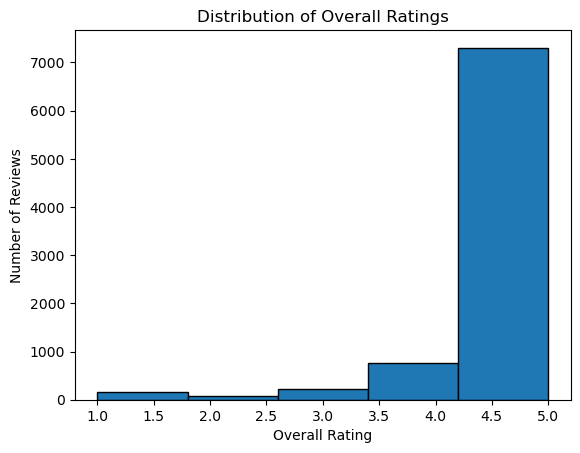

In [4]:
# Distribution of Ratings
# Filter out rows where 'overallScore' is None
comments_filtered = comments_potential.dropna(subset=['overallScore'])
comments_filtered['overallScore'] = pd.to_numeric(comments_filtered['overallScore'], errors='coerce')
plt.hist(comments_filtered['overallScore'], bins=5, edgecolor='black')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [5]:
# Convert columns to numeric values

comments_potential['overallScore'] = pd.to_numeric(comments_potential['overallScore'], errors='coerce')
comments_potential['overall'] = pd.to_numeric(comments_potential['overall'], errors='coerce')
comments_potential['curriculum'] = pd.to_numeric(comments_potential['curriculum'], errors='coerce')
comments_potential['jobSupport'] = pd.to_numeric(comments_potential['jobSupport'], errors='coerce')

# Remove rows with NaN values
comments_potential = comments_potential.dropna(subset=['overallScore', 'overall', 'curriculum', 'jobSupport'])

# Correlation calculation
correlation1 = comments_potential['overallScore'].corr(comments_potential['curriculum'])
correlation2 = comments_potential['overallScore'].corr(comments_potential['jobSupport'])
correlation3 = comments_potential['overallScore'].corr(comments_potential['overall'])

print(correlation1, correlation2, correlation3)


0.8670287503220033 0.8886426071954746 0.9165756776418823


Top Schools by Average Rating:
                 overallScore  school
school                               
le-wagon             4.914655    2552
ironhack             4.738088    1234
app-academy          4.595133    1089
springboard          4.594262    1429
flatiron-school      4.484184     196


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/3176247100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_potential['overallScore'] = pd.to_numeric(comments_potential['overallScore'], errors='coerce')


<function matplotlib.pyplot.show(close=None, block=None)>

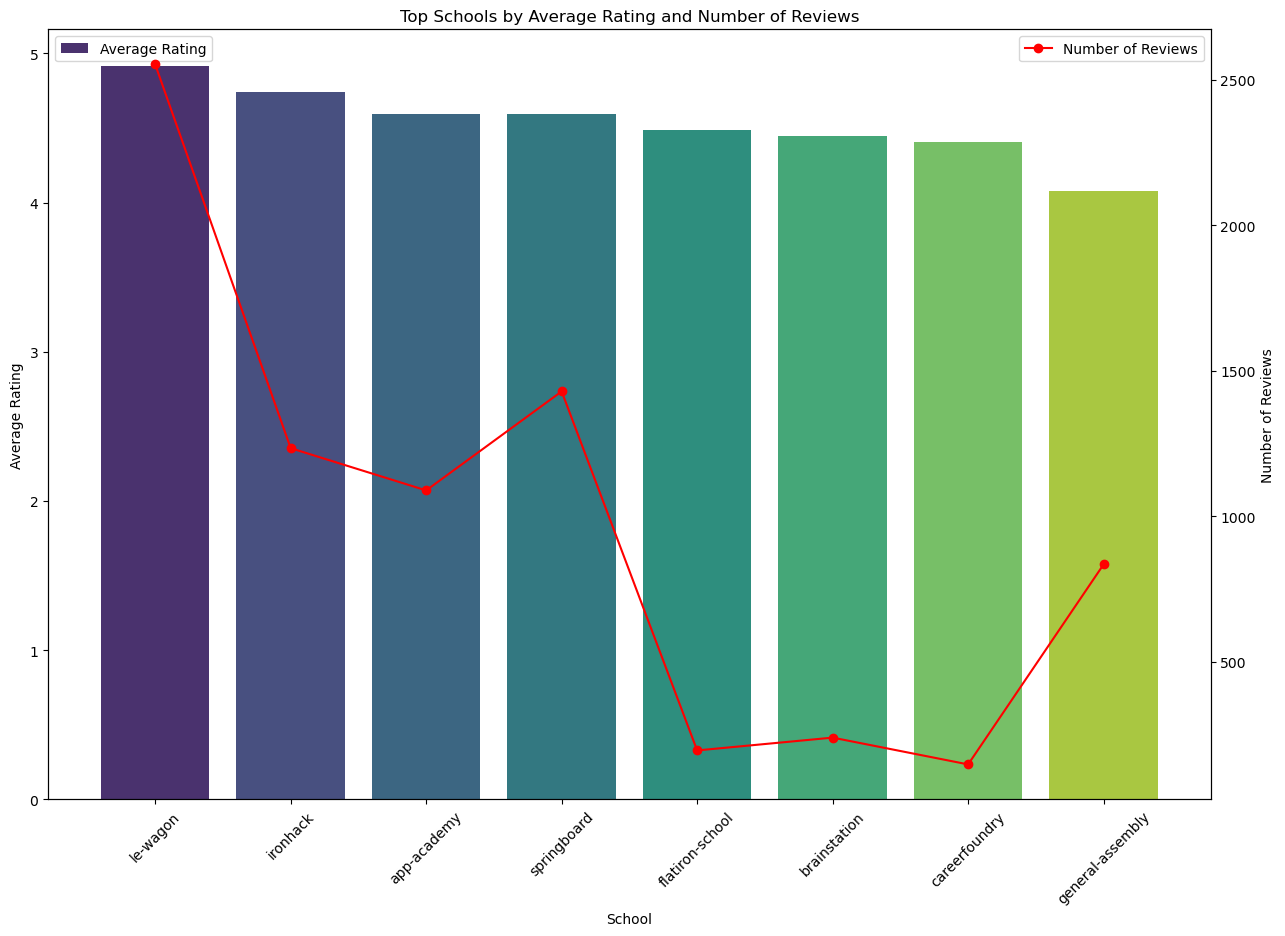

In [6]:
# Convert 'overallScore' to numeric
comments_potential['overallScore'] = pd.to_numeric(comments_potential['overallScore'], errors='coerce')

# Drop rows with NaN values in 'overallScore' if needed
comments_potential = comments_potential.dropna(subset=['overallScore'])

# 1. Group by school and calculate average rating and number of reviews
school_metrics = comments_potential.groupby('school').agg({'overallScore': 'mean', 'school': 'size'}).sort_values(by='overallScore', ascending=False)

# 2. Print or visualize the top schools by average rating
print("Top Schools by Average Rating:")
print(school_metrics.head())

# Bar plot for Top Schools by Average Rating
plt.figure(figsize=(15, 10))
sns.barplot(x=school_metrics.head(10).index, y=school_metrics['overallScore'].head(10), palette='viridis', label='Average Rating')
plt.title('Top Schools by Average Rating and Number of Reviews')
plt.xlabel('School')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Line plot for Number of Reviews
ax2 = plt.twinx()
ax2.plot(school_metrics.head(10).index, school_metrics['school'].head(10), marker='o', color='red', label='Number of Reviews')
ax2.set_ylabel('Number of Reviews')
ax2.legend(loc='upper right')

plt.show

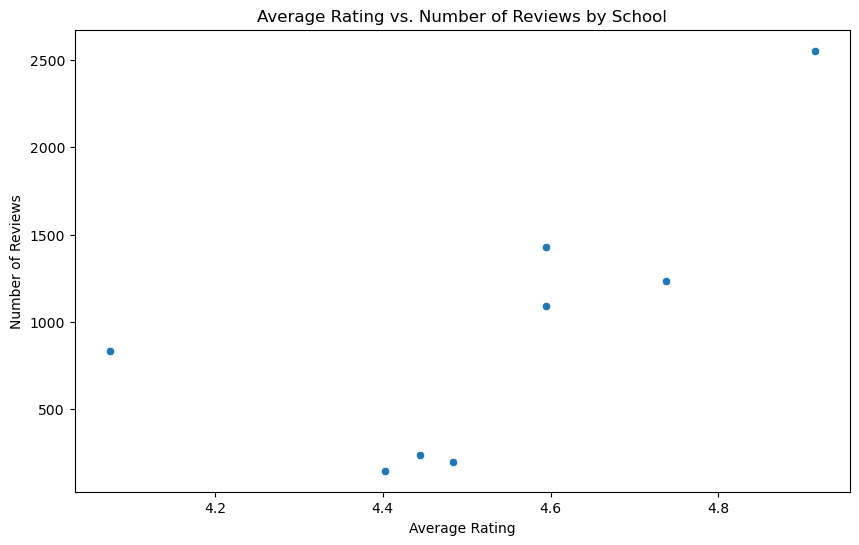

In [7]:
# Convert 'overallScore' to numeric
comments_potential['overallScore'] = pd.to_numeric(comments_potential['overallScore'], errors='coerce')

# Drop rows with NaN values in 'overallScore' if needed
comments_potential = comments_potential.dropna(subset=['overallScore'])

# 1. Group by school and calculate average rating and number of reviews
school_metrics = comments_potential.groupby('school').agg({'overallScore': 'mean', 'school': 'size'}).sort_values(by='overallScore', ascending=False)

# Scatter plot for Average Rating vs. Number of Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='overallScore', y='school', data=school_metrics)
plt.title('Average Rating vs. Number of Reviews by School')
plt.xlabel('Average Rating')
plt.ylabel('Number of Reviews')
plt.show()

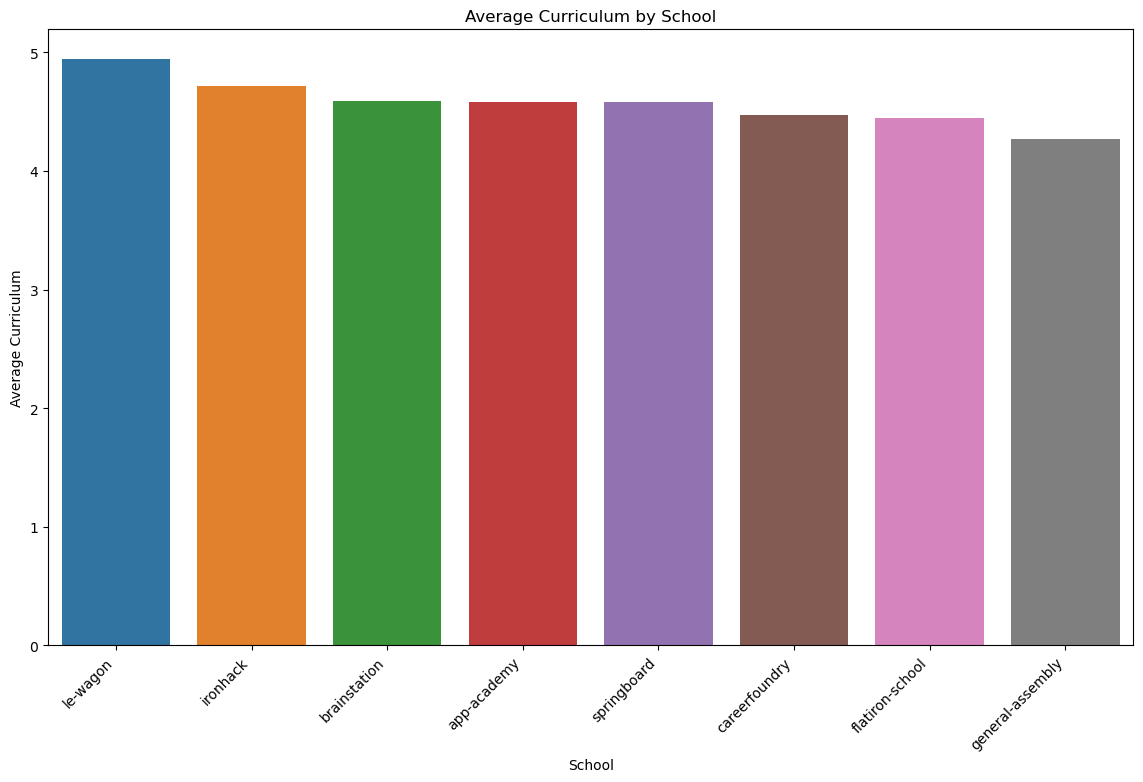

In [8]:
comments_potential['curriculum'] = pd.to_numeric(comments_potential['curriculum'], errors='coerce')

# 1. Group by school and calculate the average job support
school_job_support = comments_potential.groupby('school')['curriculum'].mean()

# 2. Order schools by average job support
school_job_support = school_job_support.sort_values(ascending=False)

# 3. Plot the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x=school_job_support.index, y=school_job_support.values, order=school_job_support.index)
plt.title('Average Curriculum by School')
plt.xlabel('School')
plt.ylabel('Average Curriculum')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [9]:
def get_school_info(school, school_id):
    url = 'https://www.switchup.org/chimera/v1/bootcamp-data?mainTemplate=bootcamp-data%2Fdescription&path=%2Fbootcamps%2F'+ str(school) + '&isDataTarget=false&bootcampId='+ str(school_id) + '&logoTag=logo&truncationLength=250&readMoreOmission=...&readMoreText=Read%20More&readLessText=Read%20Less'

    data = requests.get(url).json()

    data.keys()

    courses = data['content']['courses']
    courses_df = pd.DataFrame(courses, columns= ['courses'])

    locations = data['content']['locations']
    locations_df = json_normalize(locations)

    badges_df = pd.DataFrame(data['content']['meritBadges'])

    website = data['content']['webaddr']
    description = data['content']['description']
    logoUrl = data['content']['logoUrl']
    school_df = pd.DataFrame([website,description,logoUrl]).T
    school_df.columns =  ['website','description','LogoUrl']

    locations_df['school'] = school
    courses_df['school'] = school
    badges_df['school'] = school
    school_df['school'] = school


    locations_df['school_id'] = school_id
    courses_df['school_id'] = school_id
    badges_df['school_id'] = school_id
    school_df['school_id'] = school_id

    return locations_df, courses_df, badges_df, school_df

locations_list = []
courses_list = []
badges_list = []
schools_list = []

for school, id in potential_schools.items():
    print(school)
    a,b,c,d = get_school_info(school,id)

    locations_list.append(a)
    courses_list.append(b)
    badges_list.append(c)
    schools_list.append(d)


ironhack


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/1686783526.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


app-academy


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/1686783526.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


springboard


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/1686783526.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


general-assembly


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/1686783526.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


flatiron-school


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/1686783526.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


careerfoundry


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/1686783526.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


brainstation


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/1686783526.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


le-wagon


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/1686783526.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


In [10]:
potential_locations = pd.concat(locations_list)
potential_locations

,id,description,country.id,country.name,country.abbrev,city.id,city.name,city.keyword,state.id,state.name,state.abbrev,state.keyword,school,school_id
0,15901,"Berlin, Germany",57.0,Germany,DE,31156.0,Berlin,berlin,NaN,NaN,NaN,NaN,ironhack,10828
1,16022,"Mexico City, Mexico",29.0,Mexico,MX,31175.0,Mexico City,mexico-city,NaN,NaN,NaN,NaN,ironhack,10828
2,16086,"Amsterdam, Netherlands",59.0,Netherlands,NL,31168.0,Amsterdam,amsterdam,NaN,NaN,NaN,NaN,ironhack,10828
3,16088,"Sao Paulo, Brazil",42.0,Brazil,BR,31121.0,Sao Paulo,sao-paulo,NaN,NaN,NaN,NaN,ironhack,10828
4,16109,"Paris, France",38.0,France,FR,31136.0,Paris,paris,NaN,NaN,NaN,NaN,ironhack,10828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,18128,"Zurich, Switzerland",32.0,Switzerland,CH,31082.0,Zurich,zurich,NaN,NaN,NaN,NaN,le-wagon,10868
34,18194,"Porto, Portugal",28.0,Portugal,PT,31102.0,Porto,porto,NaN,NaN,NaN,NaN,le-wagon,10868
35,18195,"Cape Town, South Africa",17.0,South Africa,ZA,31100.0,Cape Town,cape-town,NaN,NaN,NaN,NaN,le-wagon,10868
36,18295,"Toulouse, France",38.0,France,FR,31191.0,Toulouse,toulouse,NaN,NaN,NaN,NaN,le-wagon,10868


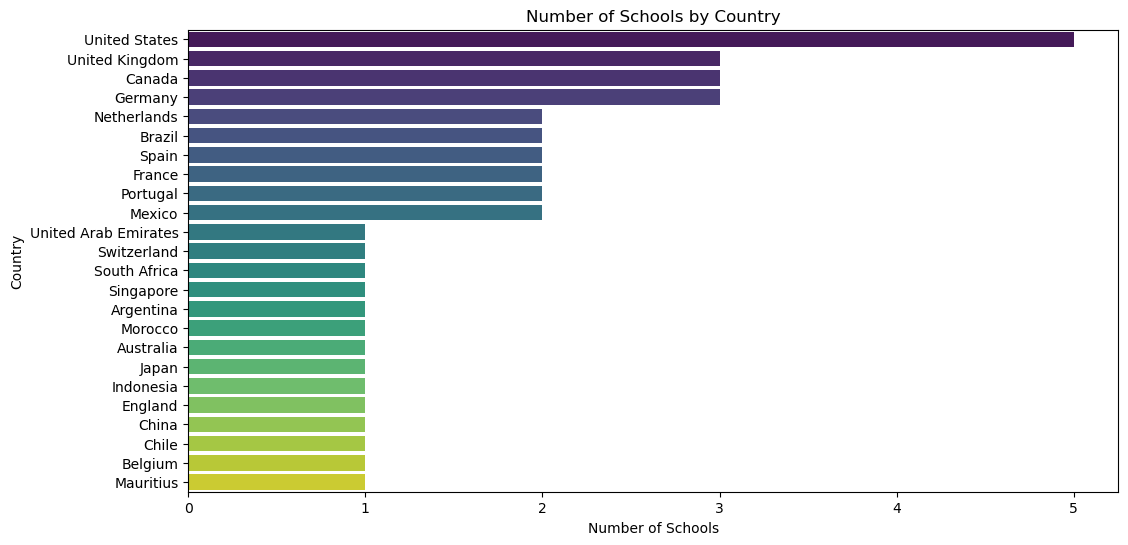

In [11]:
# Count of Schools by Country
school_count_by_country = potential_locations.groupby('country.name')['school'].nunique().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=school_count_by_country.values, y=school_count_by_country.index, palette='viridis')
plt.title('Number of Schools by Country')
plt.xlabel('Number of Schools')
plt.ylabel('Country')
plt.show()


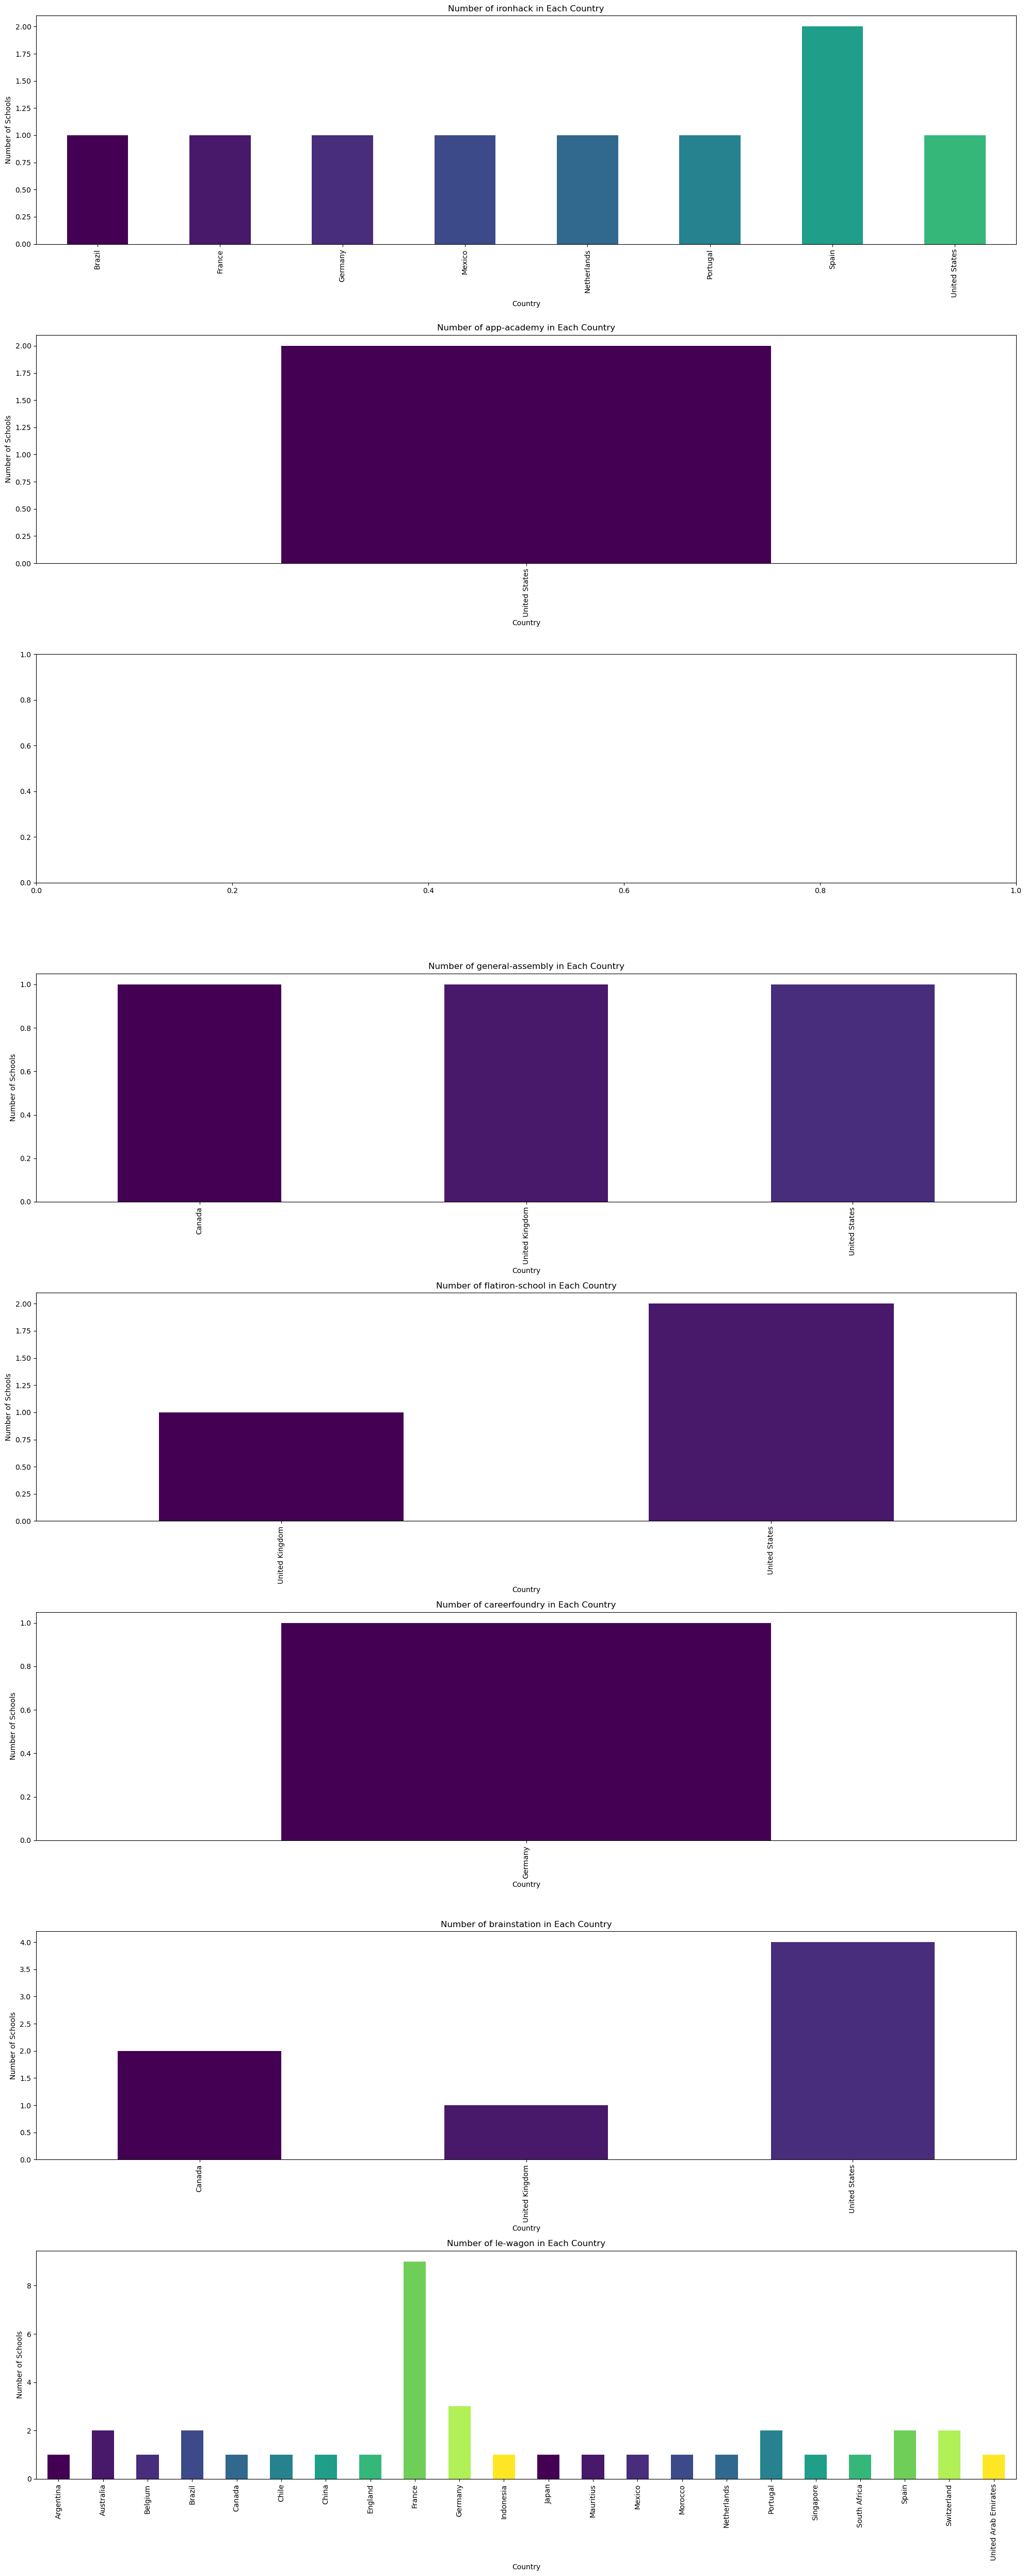

In [12]:
# Count of Each School by Country
school_count_by_country = potential_locations.groupby(['school', 'country.name']).size().unstack()

# Get the list of schools
schools = potential_locations['school'].unique()

# Create subplots
fig, axes = plt.subplots(len(schools), 1, figsize=(20, 50))

# Plot each school
for i, school in enumerate(schools):
    # Check if the school exists in the DataFrame
    if school in school_count_by_country.index:
        ax = axes[i]
        school_count_by_country.loc[school].dropna().plot(kind='bar', ax=ax, color=['#440154', '#48186a', '#472d7b', '#3d4a89', '#31688e', '#26828e', '#1f9e89', '#35b779', '#6ece58', '#b1f056', '#fde725'])
        ax.set_title(f'Number of {school} in Each Country')
        ax.set_xlabel('Country')
        ax.set_ylabel('Number of Schools')

# Adjust layout
plt.tight_layout()
plt.show()

After a market analysis, we have compiled a list of potential competitors for Ironhack: app-academy; springboard; general-assembly; flatiron-school; careerfoundry; brainstation; and le-wagon. 
After examining the data related to these schools, we consider le-wagon to be the direct competitor of Ironhack. This is because le-wagon is a school with a global presence, especially strong in Europe. 
Among the selected schools and based on Switchup, le-wagon has the highest average overall rating  and also boasts the largest number of reviews. Therefore, we have decided to focus our comparative data on le-wagon.

# Data Clean

In [13]:
# you must populate this dict with the schools required -> try talking to the teaching team about this


schools ={
'ironhack' : 10828,
'le-wagon':10868
}


def get_comments_school(school):
    TAG_RE = re.compile(r'<[^>]+>')
    # defines url to make api call to data -> dynamic with school if you want to scrape competition
    url = "https://www.switchup.org/chimera/v1/school-review-list?mainTemplate=school-review-list&path=%2Fbootcamps%2F" + school + "&isDataTarget=false&page=3&perPage=10000&simpleHtml=true&truncationLength=250"
    #makes get request and converts answer to json
    # url defines the page of all the information, request is made, and information is returned to data variable
    data = requests.get(url).json()
    #converts json to dataframe
    reviews =  pd.DataFrame(data['content']['reviews'])

    #aux function to apply regex and remove tags
    def remove_tags(x):
        return TAG_RE.sub('',x)
    reviews['review_body'] = reviews['body'].apply(remove_tags)
    reviews['school'] = school
    return reviews

In [14]:
#List comprehension

comments = pd.concat([get_comments_school(school) for school in schools.keys()])

In [15]:
# replace missing program name as a rating on school in geneneal as the review still valid from a customer journey perspectif
comments['program'] = comments['program'].fillna("genneral") 
comments = comments[comments['graduatingYear'].isna() == False]
# Change column data types
comments['graduatingYear'] = comments['graduatingYear'].astype('int')
comments['overallScore'] = comments['overallScore'].astype('float64')
comments['overall'] = comments['overall'].astype('float64')
comments['curriculum'] = comments['curriculum'].astype('float64')
comments['jobSupport'] = comments['jobSupport'].astype('float64')

In [16]:
comments

,id,name,anonymous,hostProgramName,graduatingYear,isAlumni,jobTitle,tagline,body,rawBody,...,queryDate,program,user,overallScore,comments,overall,curriculum,jobSupport,review_body,school
0,306372,Sergio Burgos,False,None,2023,False,International Negotiator,The Most Intense Academic Challenge,"<span class=""truncatable""><p></p><p>After comp...",<p>After completing my Data Analytics Bootcamp...,...,2023-11-10,Data Analytics Bootcamp,{'image': None},3.3,[],3.0,3.0,4.0,After completing my Data Analytics Bootcamp wi...,ironhack
1,306215,Anonymous,True,None,2023,True,,Transformative Experience: My Time at Ironhack,"<span class=""truncatable""><p></p><p>Pros: 1)In...",<p>Pros: 1)Intensive Learning 2)Real-World Pro...,...,2023-11-06,Web Development Bootcamp,{'image': None},4.0,[],4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack
2,306068,Anonymous,True,None,2023,False,Full stack development,Now I can do it,"<span class=""truncatable""><p></p><p>7 months a...","<p>7 months ago, I only had an idea about html...",...,2023-10-31,genneral,{'image': None},5.0,[],5.0,5.0,5.0,"7 months ago, I only had an idea about html an...",ironhack
3,305297,Utku Cikmaz,False,None,2023,False,Full Stack Web Developer,It was good,"<span class=""truncatable""><p></p><p>The course...","<p>The course was great. Especially, Luis is a...",...,2023-10-02,Web Development Bootcamp,{'image': None},4.0,[],5.0,3.0,4.0,"The course was great. Especially, Luis is a gr...",ironhack
4,305278,Nirmal Hodge,False,None,2023,False,Product Designer,Ironhack 100% Worth It!,"<span class=""truncatable""><p></p><p>I joined t...",<p>I joined the UX/ UI Bootcamp and to be hone...,...,2023-09-30,UX/UI Design Bootcamp,{'image': None},5.0,[],5.0,5.0,5.0,I joined the UX/ UI Bootcamp and to be honest ...,ironhack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,231859,Anonymous,False,None,2014,True,Software engineer at Compass,I highly recommend this bootcamp... to EVERYONE!,"<span class=""truncatable""><p>Put simply: I kne...",Put simply: I knew nothing about development 5...,...,2014-10-18,genneral,{'image': None},4.3,[],5.0,4.0,4.0,Put simply: I knew nothing about development 5...,le-wagon
2726,231857,Baptiste H.,False,None,2014,True,Software Engineer,"I entered ""le Wagon"" program et I and found a ...","<span class=""truncatable""><p>I entered ""le Wag...","I entered ""le Wagon"" with my partner and we bo...",...,2014-10-17,genneral,{'image': None},5.0,[],5.0,5.0,5.0,"I entered ""le Wagon"" with my partner and we bo...",le-wagon
2728,231853,Olivier Xu,False,None,2014,True,Co-founder @ getkudoz.com,Le Wagon,"<span class=""truncatable""><p>I attended the 10...",I attended the 10-week bootcamp by Le Wagon in...,...,2014-10-15,genneral,{'image': None},5.0,[],5.0,5.0,5.0,I attended the 10-week bootcamp by Le Wagon in...,le-wagon
2729,231852,Sébastien,False,None,2014,True,Junior Developer,From zero to a developer job in 9 weeks.,"<span class=""truncatable""><p>I entered ""le Wag...","I entered ""le Wagon"" program after being gradu...",...,2014-10-15,genneral,{'image': None},5.0,[],5.0,5.0,5.0,"I entered ""le Wagon"" program after being gradu...",le-wagon


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/2175119026.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = comments.groupby(['school', 'graduatingYear']).mean().reset_index()


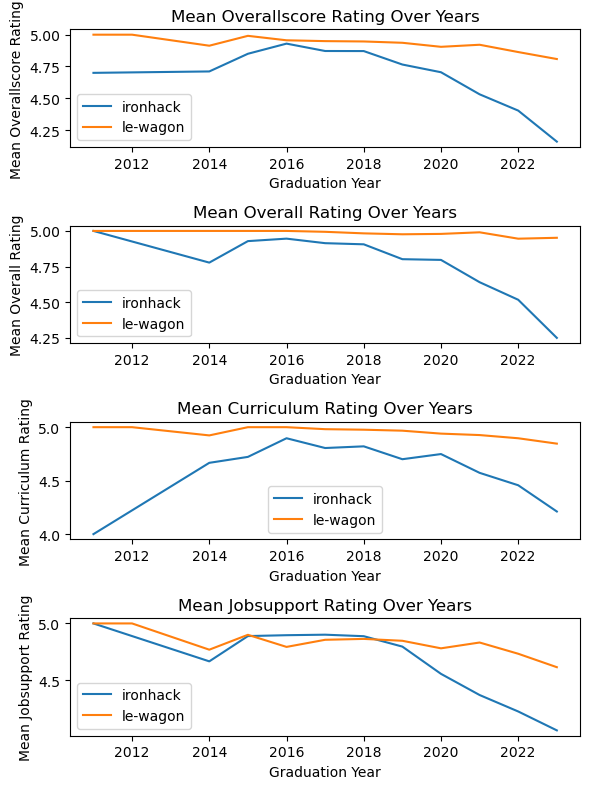

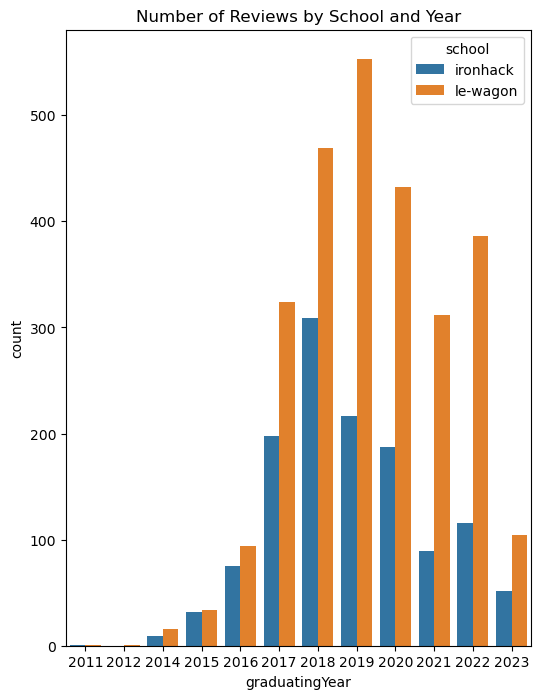

In [17]:
# Group by school and year, calculate the mean
grouped_data = comments.groupby(['school', 'graduatingYear']).mean().reset_index()

# Plot line charts for mean ratings
fig, axes = plt.subplots(nrows=4, figsize=(6, 8))

for ax, rating_type in zip(axes, ['overallScore','overall', 'curriculum', 'jobSupport']):
    for school in grouped_data['school'].unique():
        school_data = grouped_data[grouped_data['school'] == school]
        ax.plot(school_data['graduatingYear'], school_data[rating_type], label=school)

    ax.set_xlabel('Graduation Year')
    ax.set_ylabel(f'Mean {rating_type.replace("_", " ").title()} Rating')
    ax.set_title(f'Mean {rating_type.replace("_", " ").title()} Rating Over Years')
    ax.legend()

plt.tight_layout()
plt.show()

# Plotting review counts

plt.figure(figsize=(6, 8))
sns.countplot(data=comments, x='graduatingYear', hue='school')
plt.title('Number of Reviews by School and Year')
plt.show()

In [18]:
#clean comments df

def clean_data(df):
    # Clean HTML tags from text columns
    text_columns = ['tagline', 'body', 'rawBody', 'review_body']
    for col in text_columns:
        df[col] = df[col].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text() if x is not None else x)

    # Convert 'graduatingYear' to integer
    df['graduatingYear'] = df['graduatingYear'].astype('Int64')

    # Convert 'queryDate' to datetime
    df['queryDate'] = pd.to_datetime(df['queryDate'])

    return df

# Apply the clean_data function to your DataFrame
cleaned_comments = clean_data(comments)
#drop columns
cleaned_comments = cleaned_comments [['id', 'program', 'graduatingYear','overallScore', 'overall','curriculum', 'jobSupport', 'tagline','review_body','school']]

/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/1799817622.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df[col] = df[col].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text() if x is not None else x)


In [19]:
cleaned_comments

,id,program,graduatingYear,overallScore,overall,curriculum,jobSupport,tagline,review_body,school
0,306372,Data Analytics Bootcamp,2023,3.3,3.0,3.0,4.0,The Most Intense Academic Challenge,After completing my Data Analytics Bootcamp wi...,ironhack
1,306215,Web Development Bootcamp,2023,4.0,4.0,4.0,4.0,Transformative Experience: My Time at Ironhack,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack
2,306068,genneral,2023,5.0,5.0,5.0,5.0,Now I can do it,"7 months ago, I only had an idea about html an...",ironhack
3,305297,Web Development Bootcamp,2023,4.0,5.0,3.0,4.0,It was good,"The course was great. Especially, Luis is a gr...",ironhack
4,305278,UX/UI Design Bootcamp,2023,5.0,5.0,5.0,5.0,Ironhack 100% Worth It!,I joined the UX/ UI Bootcamp and to be honest ...,ironhack
...,...,...,...,...,...,...,...,...,...,...
2725,231859,genneral,2014,4.3,5.0,4.0,4.0,I highly recommend this bootcamp... to EVERYONE!,Put simply: I knew nothing about development 5...,le-wagon
2726,231857,genneral,2014,5.0,5.0,5.0,5.0,"I entered ""le Wagon"" program et I and found a ...","I entered ""le Wagon"" with my partner and we bo...",le-wagon
2728,231853,genneral,2014,5.0,5.0,5.0,5.0,Le Wagon,I attended the 10-week bootcamp by Le Wagon in...,le-wagon
2729,231852,genneral,2014,5.0,5.0,5.0,5.0,From zero to a developer job in 9 weeks.,"I entered ""le Wagon"" program after being gradu...",le-wagon


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/3878364501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ironhack_cmt['category'] = pd.cut(ironhack_cmt['overallScore'], bins=[0, 3.5, 4.5, 5], labels=['Low rating', 'Medium rating', 'High rating'], right=False)
/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/3878364501.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lewagon_cmt['category'] = pd.cut(lewagon_cmt['overallScore'], bins=[0, 3.5, 4.5, 5], labels=['Low rat

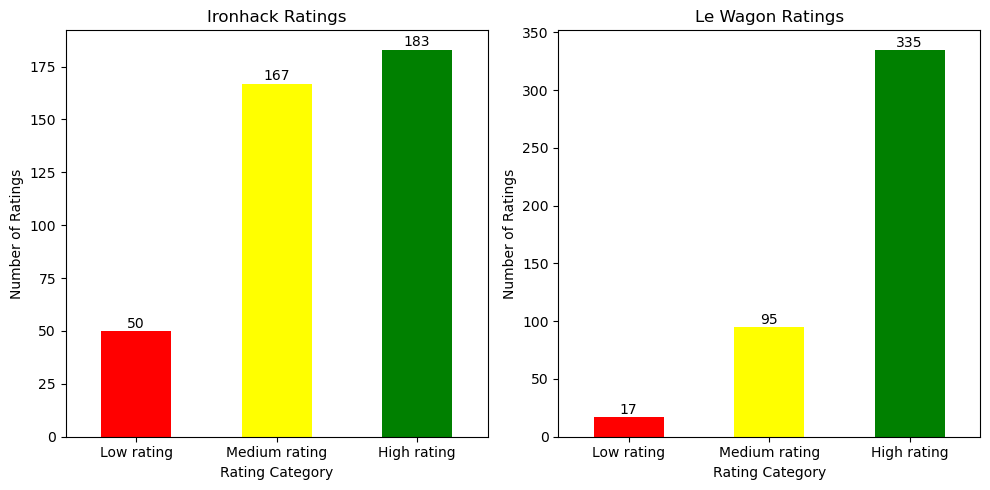

In [20]:
#Categorize rating into 3 bins to identify strength, weakness, interest from students:
#ironhack data
ironhack_cmt = cleaned_comments[cleaned_comments['school'] == 'ironhack']

#lewagon data
lewagon_cmt = cleaned_comments[cleaned_comments['school'] == 'le-wagon']
ironhack_cmt['category'] = pd.cut(ironhack_cmt['overallScore'], bins=[0, 3.5, 4.5, 5], labels=['Low rating', 'Medium rating', 'High rating'], right=False)
lewagon_cmt['category'] = pd.cut(lewagon_cmt['overallScore'], bins=[0, 3.5, 4.5, 5], labels=['Low rating', 'Medium rating', 'High rating'], right=False)

# Count the number of ratings in each category
ironhack_counts = ironhack_cmt['category'].value_counts().sort_index()
lewagon_counts = lewagon_cmt['category'].value_counts().sort_index()

# Set custom colors for each category
colors = {'Low rating': 'red', 'Medium rating': 'yellow', 'High rating': 'green'}

# Plot bar charts for Ironhack and Le Wagon
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ironhack_counts.plot(kind='bar', color=[colors[c] for c in ironhack_counts.index], ax=axes[0], rot=0)
axes[0].set_title('Ironhack Ratings')
axes[0].set_xlabel('Rating Category')
axes[0].set_ylabel('Number of Ratings')

lewagon_counts.plot(kind='bar', color=[colors[c] for c in lewagon_counts.index], ax=axes[1], rot=0)
axes[1].set_title('Le Wagon Ratings')
axes[1].set_xlabel('Rating Category')
axes[1].set_ylabel('Number of Ratings')

# Add data labels
for ax in axes:
    for i, v in enumerate(ax.patches):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.1, str(int(v.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

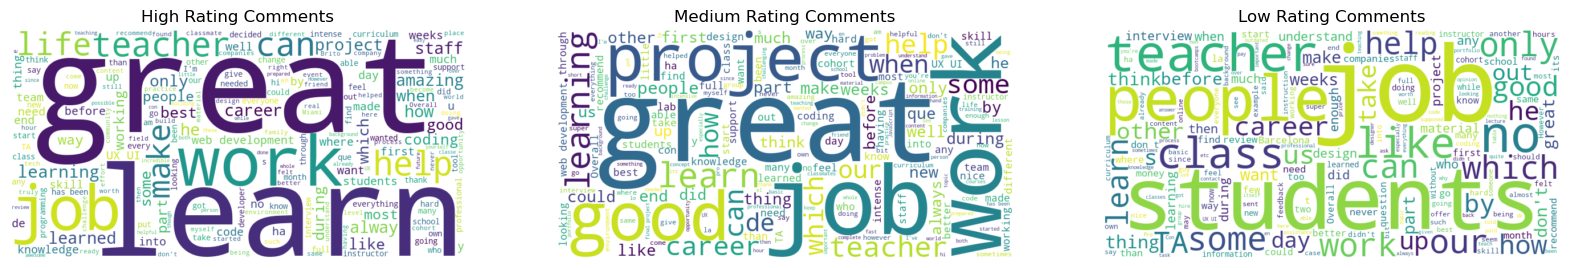

In [21]:
#Word cloud for Ironhack:

# Separate comments based on overall ratings
high_rating_comments = ' '.join(ironhack_cmt[ironhack_cmt['overallScore'] > 4.5]['review_body'])
medium_rating_comments = ' '.join(ironhack_cmt[(ironhack_cmt['overallScore'] >= 3.5) & (ironhack_cmt['overallScore'] <= 4.5)]['review_body'])
low_rating_comments = ' '.join(ironhack_cmt[ironhack_cmt['overallScore'] < 3.5]['review_body'])
# Words to exclude
stopwords = {'experience', 'ironhack', 'course', 'program', 'that', 'for', 'data', "they",'have',"student","one","if","time","me","so","at","your",'were','we','really','be','what','after'
             'analytics', 'year', 'the',"I","and","bootcamp","to", "a", "an","you","in","is","week","was","of","this","it","with","have","from","are","but","all","my","on","as","very","not",
            'their','there','will','had','after','do','more','also','get','because','or','them','about','would','read','less','more','just','lot','even'}


# Create WordCloud objects for each subset of comments
wordcloud_high_rating = WordCloud(width=800, height=400, background_color='white',stopwords=stopwords).generate(high_rating_comments)
wordcloud_medium_rating = WordCloud(width=800, height=400, background_color='white',stopwords=stopwords).generate(medium_rating_comments)
wordcloud_low_rating = WordCloud(width=800, height=400, background_color='white',stopwords=stopwords).generate(low_rating_comments)

# Plot the WordCloud images
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# High Rating WordCloud
axes[0].imshow(wordcloud_high_rating, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('High Rating Comments')

# Medium Rating WordCloud
axes[1].imshow(wordcloud_medium_rating, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Medium Rating Comments')

# Low Rating WordCloud
axes[2].imshow(wordcloud_low_rating, interpolation='bilinear')
axes[2].axis('off')
axes[2].set_title('Low Rating Comments')

plt.show()

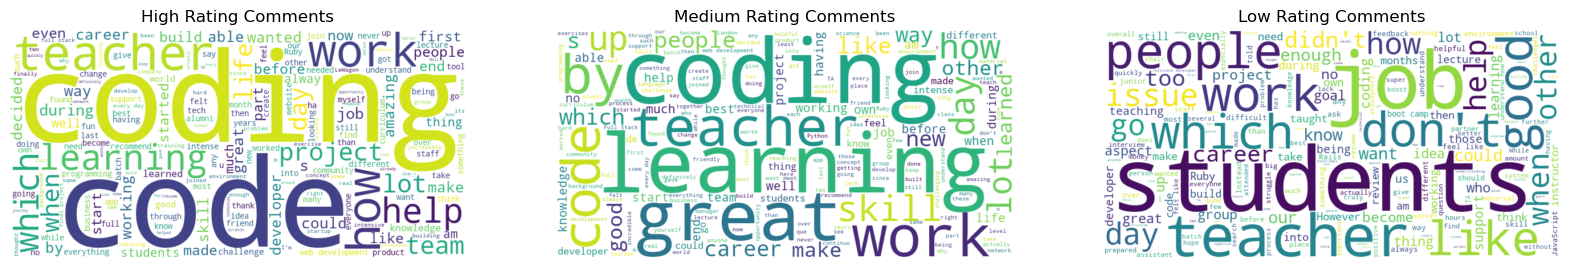

In [22]:

# Word cloud for Le Wagon
high_rating_comments = ' '.join(lewagon_cmt[lewagon_cmt['overallScore'] > 4.5]['review_body'])
medium_rating_comments = ' '.join(lewagon_cmt[(lewagon_cmt['overallScore'] >= 3.5) & (lewagon_cmt['overallScore'] <= 4.5)]['review_body'])
low_rating_comments = ' '.join(lewagon_cmt[lewagon_cmt['overallScore'] < 3.5]['review_body'])
# Words to exclude
stopwords = {'experience', 'le','wagon', 'course', 'program', 'that', 'for', 'data', "they",'have',"student","one","if","time","me","so","at","your",'were','we','really','be','what','after'
             'analytics', 'year', 'the',"I","and","bootcamp","to", "a", "an","you","in","is","week","was","of","this","it","with","have","from","are","but","all","my","on","as","very","not",
            'their','there','will','had','after','do','more','also','get','because','or','them','some','would','weeks','can','did','where','just','don','about','out','only','read','less','learn'}


# Create WordCloud objects for each subset of comments
wordcloud_high_rating = WordCloud(width=800, height=400, background_color='white',stopwords=stopwords).generate(high_rating_comments)
wordcloud_medium_rating = WordCloud(width=800, height=400, background_color='white',stopwords=stopwords).generate(medium_rating_comments)
wordcloud_low_rating = WordCloud(width=800, height=400, background_color='white',stopwords=stopwords).generate(low_rating_comments)

# Plot the WordCloud images
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# High Rating WordCloud
axes[0].imshow(wordcloud_high_rating, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('High Rating Comments')

# Medium Rating WordCloud
axes[1].imshow(wordcloud_medium_rating, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Medium Rating Comments')

# Low Rating WordCloud
axes[2].imshow(wordcloud_low_rating, interpolation='bilinear')
axes[2].axis('off')
axes[2].set_title('Low Rating Comments')

plt.show()

1. The wagon has higher number of comments but much lower low rating. The rating for Wagon has been consistely high
2. Word cloud for Ironhack shows that people have great experience gave good rating, all categories mentions "job", 
showing strong interest/key criteria for ranking
3.Work cloud for the Wagon shows more highlight on "code/coding", teacher,skill,learn' --> might hinting a better curriculum or teaching method

next step : 
1.see course structure of the wagon, job guarantee and stats on job search for both school
2.compare "reason for attending" from student to what schools are doing
3.market potential on differnet continents
4.suggestion for ironhack

In [23]:
def get_school_info(school, school_id):
    url = 'https://www.switchup.org/chimera/v1/bootcamp-data?mainTemplate=bootcamp-data%2Fdescription&path=%2Fbootcamps%2F'+ str(school) + '&isDataTarget=false&bootcampId='+ str(school_id) + '&logoTag=logo&truncationLength=250&readMoreOmission=...&readMoreText=Read%20More&readLessText=Read%20Less'

    data = requests.get(url).json()

    data.keys()

    courses = data['content']['courses']
    courses_df = pd.DataFrame(courses, columns= ['courses'])

    locations = data['content']['locations']
    locations_df = json_normalize(locations)

    badges_df = pd.DataFrame(data['content']['meritBadges'])

    website = data['content']['webaddr']
    description = data['content']['description']
    logoUrl = data['content']['logoUrl']
    school_df = pd.DataFrame([website,description,logoUrl]).T
    school_df.columns =  ['website','description','LogoUrl']

    locations_df['school'] = school
    courses_df['school'] = school
    badges_df['school'] = school
    school_df['school'] = school


    locations_df['school_id'] = school_id
    courses_df['school_id'] = school_id
    badges_df['school_id'] = school_id
    school_df['school_id'] = school_id

    return locations_df, courses_df, badges_df, school_df

locations_list = []
courses_list = []
badges_list = []
schools_list = []

for school, id in schools.items():
    print(school)
    a,b,c,d = get_school_info(school,id)

    locations_list.append(a)
    courses_list.append(b)
    badges_list.append(c)
    schools_list.append(d)



ironhack


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/2954897153.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


le-wagon


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/2954897153.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  locations_df = json_normalize(locations)


In [24]:
locations = pd.concat(locations_list)
locations

,id,description,country.id,country.name,country.abbrev,city.id,city.name,city.keyword,state.id,state.name,state.abbrev,state.keyword,school,school_id
0,15901,"Berlin, Germany",57.0,Germany,DE,31156.0,Berlin,berlin,NaN,NaN,NaN,NaN,ironhack,10828
1,16022,"Mexico City, Mexico",29.0,Mexico,MX,31175.0,Mexico City,mexico-city,NaN,NaN,NaN,NaN,ironhack,10828
2,16086,"Amsterdam, Netherlands",59.0,Netherlands,NL,31168.0,Amsterdam,amsterdam,NaN,NaN,NaN,NaN,ironhack,10828
3,16088,"Sao Paulo, Brazil",42.0,Brazil,BR,31121.0,Sao Paulo,sao-paulo,NaN,NaN,NaN,NaN,ironhack,10828
4,16109,"Paris, France",38.0,France,FR,31136.0,Paris,paris,NaN,NaN,NaN,NaN,ironhack,10828
5,16375,"Miami, FL, United States",1.0,United States,US,31.0,Miami,miami,11.0,Florida,FL,florida,ironhack,10828
6,16376,"Madrid, Spain",12.0,Spain,ES,31052.0,Madrid,madrid,NaN,NaN,NaN,NaN,ironhack,10828
7,16377,"Barcelona, Spain",12.0,Spain,ES,31170.0,Barcelona,barcelona,NaN,NaN,NaN,NaN,ironhack,10828
8,16709,"Lisbon, Portugal",28.0,Portugal,PT,31075.0,Lisbon,lisbon,NaN,NaN,NaN,NaN,ironhack,10828
9,17233,Online,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Online,Online,online,ironhack,10828


In [25]:
def clean_dataframe(df):
    # Fill missing values in specific columns with default values
    columns_to_fillna = {'state.name': 'Unknown', 'state.abbrev': 'Unknown', 'state.keyword': 'Unknown'}
    df.fillna(value=columns_to_fillna, inplace=True)

    # Remove leading and trailing whitespaces from string columns
    string_columns = ['description', 'country.name', 'country.abbrev', 'city.name', 'city.keyword',
                      'state.name', 'state.abbrev', 'state.keyword', 'school']
    df[string_columns] = df[string_columns].apply(lambda x: x.str.strip() if x.dtype == 'O' else x)

    return df

locations_cleaned = clean_dataframe(locations)
#drop columns
locations_cleaned = locations_cleaned [['id', 'country.id', 'country.name', 'city.id','city.name', 'school', 'school_id']]
locations_cleaned


,id,country.id,country.name,city.id,city.name,school,school_id
0,15901,57.0,Germany,31156.0,Berlin,ironhack,10828
1,16022,29.0,Mexico,31175.0,Mexico City,ironhack,10828
2,16086,59.0,Netherlands,31168.0,Amsterdam,ironhack,10828
3,16088,42.0,Brazil,31121.0,Sao Paulo,ironhack,10828
4,16109,38.0,France,31136.0,Paris,ironhack,10828
5,16375,1.0,United States,31.0,Miami,ironhack,10828
6,16376,12.0,Spain,31052.0,Madrid,ironhack,10828
7,16377,12.0,Spain,31170.0,Barcelona,ironhack,10828
8,16709,28.0,Portugal,31075.0,Lisbon,ironhack,10828
9,17233,NaN,NaN,NaN,NaN,ironhack,10828


In [26]:
courses = pd.concat(courses_list)

In [27]:
def clean_courses_dataframe(df):
    # Remove leading and trailing whitespaces from string columns
    string_columns = ['courses', 'school']
    df[string_columns] = df[string_columns].apply(lambda x: x.str.strip() if x.dtype == 'O' else x)

    return df

cleaned_courses = clean_courses_dataframe(courses)
cleaned_courses

,courses,school,school_id
0,Cyber Security Bootcamp,ironhack,10828
1,Cybersecurity Part-Time,ironhack,10828
2,Data Analytics Bootcamp,ironhack,10828
3,Data Analytics Part-Time,ironhack,10828
4,UX/UI Design Bootcamp,ironhack,10828
5,UX/UI Design Part-Time,ironhack,10828
6,Web Development Bootcamp,ironhack,10828
7,Web Development Part-Time,ironhack,10828
0,Data Analytics - Full-Time,le-wagon,10868
1,Data Analytics - Part-Time,le-wagon,10868


In [28]:
badges = pd.concat(badges_list)

In [29]:

def clean_data(data):
    # Drop duplicate rows
    data = data.drop_duplicates()

    # Clean HTML tags from the 'description' column
    data['description'] = data['description'].replace(r'<.*?>', '', regex=True)

    return data

cleaned_badges = clean_data(badges)
cleaned_badges= cleaned_badges[['keyword', 'description', 'school', 'school_id']]
cleaned_badges

,keyword,description,school,school_id
0,available_online,School offers fully online courses,ironhack,10828
1,verified_outcomes,School publishes a third-party verified outcom...,ironhack,10828
2,flexible_classes,School offers part-time and evening classes,ironhack,10828
0,available_online,School offers fully online courses,le-wagon,10868
1,flexible_classes,School offers part-time and evening classes,le-wagon,10868


In [30]:
schools = pd.concat(schools_list)

In [31]:

def clean_dataframe(df):
    # Check if 'description' and 'website' columns exist in the DataFrame
    if 'description' in df.columns and 'website' in df.columns:
        # Remove unnecessary tags from the 'description' column
        df['description'] = df['description'].replace('<.*?>', '', regex=True)

        # Remove unnecessary parameters from the 'website' column
        df['website'] = df['website'].replace('\?.*$', '', regex=True)

        # Remove leading and trailing whitespaces from string columns
        df['website'] = df['website'].str.strip()
        df['school'] = df['school'].str.strip()

        # Reset the index
        df.reset_index(drop=True, inplace=True)

        return df
    else:
        print("Error: 'description' and 'website' columns not found in the DataFrame.")


cleaned_schools = clean_dataframe(schools)
if cleaned_schools is not None:
    cleaned_schools

cleaned_schools=cleaned_schools[['description','school', 'school_id']]
cleaned_schools

,description,school,school_id
0,Ironhack is a global tech school with 9 campus...,ironhack,10828
1,Le Wagon is a global leader in immersive tech ...,le-wagon,10868


# Conect MySQL

In [66]:
saved_password = getpass.getpass()

········


In [67]:
cnx= mysql.connector.connect (
    user='root',
    password= saved_password,
    host= 'localhost',
    database = 'accenture_ironhack')

In [68]:
cnx.is_connected()

True

In [69]:
cursor= cnx.cursor()

In [53]:
query= ('USE accenture_ironhack')
cursor.execute(query)

In [54]:
query = ("""CREATE TABLE IF NOT EXISTS accenture_ironhack.courses (
    course_id INT AUTO_INCREMENT PRIMARY KEY,
    school_id INT,
    school VARCHAR(100),
    course VARCHAR(100) NOT NULL,
    INDEX idx_school_id (school_id)
    );
    """)

cursor.execute(query)

In [55]:
# Define the INSERT query with placeholders
query_insert_courses = """
INSERT INTO accenture_ironhack.courses
(course, school, school_id)
VALUES (%s, %s, %s)
"""

# Create a list of tuples with the values
values_courses = [tuple(row) for row in cleaned_courses[['courses', 'school', 'school_id']].values]

# Execute the query with the provided values
cursor.executemany(query_insert_courses, values_courses)

# Commit the changes
cnx.commit()


In [56]:
# Create the 'locations' table
query = """
CREATE TABLE IF NOT EXISTS accenture_ironhack.locations (
    location_id INT AUTO_INCREMENT PRIMARY KEY,
    country_id INT,
    country_name VARCHAR(50),
    city_id INT,
    city_name VARCHAR(50),
    school VARCHAR(100),
    school_id INT,
    INDEX idx_school_id (school_id)
)
"""

# Execute the query to create the table
cursor.execute(query)

In [57]:
#Replace NaN values with a default value (e.g., 0)
locations_cleaned.fillna(0, inplace=True)

# Convert NaN values to None for proper insertion into MySQL
locations_cleaned.replace({np.nan: None}, inplace=True)

# Define the INSERT query with placeholders
query_insert_locations = """
INSERT INTO accenture_ironhack.locations
(location_id, country_id, country_name, city_id, city_name, school, school_id)
VALUES (%s, %s, %s, %s, %s, %s, %s)
"""

# Create a list of tuples with the values
values_locations = [tuple(row) for row in locations_cleaned[['id', 'country.id', 'country.name', 'city.id', 'city.name', 'school', 'school_id']].values]

# Execute the query with the provided values
cursor.executemany(query_insert_locations, values_locations)

# Commit the changes
cnx.commit()


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/2274918796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations_cleaned.fillna(0, inplace=True)
/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/2274918796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations_cleaned.replace({np.nan: None}, inplace=True)


In [60]:
query = """
CREATE TABLE IF NOT EXISTS accenture_ironhack.reviews (
    review_id INT AUTO_INCREMENT PRIMARY KEY,
    program VARCHAR(50),
    graduatingYear INT,
    overallScore FLOAT,
    overall FLOAT,
    curriculum FLOAT,
    jobSupport FLOAT,
    tagline VARCHAR(255),
    review_body TEXT,
    school VARCHAR(50),
    course_id INT,
    INDEX idx_course_id (course_id)
    
)
"""


# Execute the query to create the 'reviews' table
cursor.execute(query)


In [61]:

# Replace NaN values with None for proper insertion into MySQL
cleaned_comments.replace({np.nan: None}, inplace=True)

# Create a list of tuples with cleaned data
values_reviews = [tuple(row) for row in cleaned_comments[['id', 'program', 'graduatingYear', 'overallScore', 'overall', 'curriculum', 'jobSupport', 'tagline', 'review_body', 'school']].values]

# Execute the query with the provided values
query = """
INSERT INTO reviews (review_id, program, graduatingYear, overallScore, overall, curriculum, jobSupport, tagline, review_body, school)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

cursor.executemany(query, values_reviews)

# Commit the changes
cnx.commit()


/var/folders/8s/65t8_4tj7zn7_47t6d3v4r380000gn/T/ipykernel_48704/3050357257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_comments.replace({np.nan: None}, inplace=True)


In [62]:
 query= """ALTER TABLE accenture_ironhack.reviews
 ADD FOREIGN KEY (course_id) 
 REFERENCES accenture_ironhack.courses(course_id);
 """
cursor.execute(query)

In [63]:
query = """ALTER TABLE accenture_ironhack.locations
ADD FOREIGN KEY (school_id)
REFERENCES accenture_ironhack.courses(school_id);
"""
cursor.execute(query)

In [64]:
query = """ALTER TABLE accenture_ironhack.courses
ADD FOREIGN KEY (school_id) 
REFERENCES accenture_ironhack.locations(school_id);
"""
cursor.execute(query)

In [70]:
view_names = ['ironhack_avg_scores_before_2016']

# Create an empty dictionary to store views' data
views_data = {}

# Fetch data from each view and store it in the dictionary
for view_name in view_names:
    query = f"SELECT * FROM {view_name}"
    cursor.execute(query)
    columns = [column[0] for column in cursor.description]
    view_data = pd.DataFrame(cursor.fetchall(), columns=columns)
    views_data[view_name] = view_data
    
before_2016 = pd.DataFrame(view_data)

before_2016

,graduatingYear,school,avgOverallScore,avgOverall,avgCurriculum,avgjobSupport,concatenatedReviews
0,2011,ironhack,4.700000,5.000000,4.000000,5.000000,Thanks to the UX UI bootcamp from Ironhack I h...
1,2014,ironhack,4.711111,4.777778,4.666667,4.666667,Asistí al primer bootcamp de desarrollo de iOS...
2,2015,ironhack,4.850000,4.928571,4.722222,4.888889,After 8 weeks in the Ironhack course I feel co...
3,2016,ironhack,4.929730,4.945946,4.896552,4.896552,"""Every kid is one caring adult away from being..."


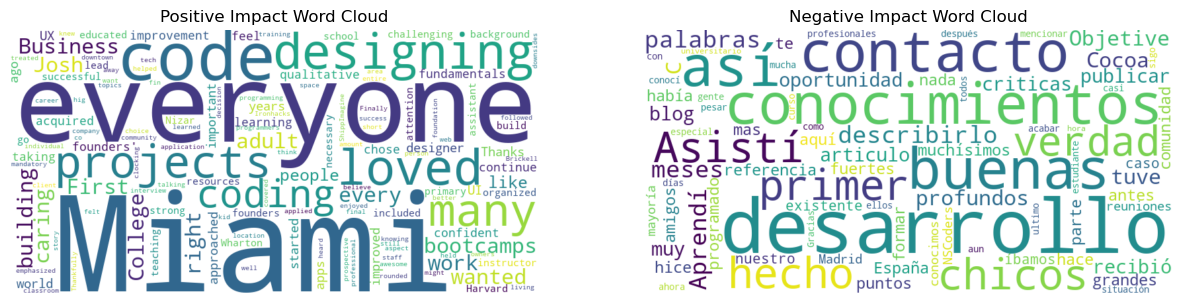

In [75]:

df = before_2016

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for each row in the specified text column
df['compound'] = df['concatenatedReviews'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Set stopwords
stop_words = set(stopwords.words('english'))
stop_words_spanish = set(stopwords.words('spanish'))
# Additional stop words to be added
additional_stop_words = [
    'experience', 'le', 'wagon', 'course', 'program', 'that', 'for', 'data', 'they', 'have', 'student',
    'one', 'if', 'time', 'me', 'so', 'at', 'your', 'were', 'we', 'really', 'be', 'what', 'after',
    'analytics', 'year', 'the', 'I', 'and', 'bootcamp', 'to', 'a', 'an', 'you', 'in', 'is', 'week', 'was',
    'of', 'this', 'it', 'with', 'have', 'from', 'are', 'but', 'all', 'my', 'on', 'as', 'very', 'not',
    'their', 'there', 'will', 'had', 'after', 'do', 'more', 'also', 'get', 'because', 'or', 'them', 'some',
    'would', 'weeks', 'can', 'did', 'where', 'just', 'don', 'about', 'out', 'only', 'read', 'less', 'learn','de','la', 'es'
    'así' 'que', 'en', 'ios', 'tengo', 'entrar','un','para', 'que', 'lo', 'tanto', 'las', 'ya', 'por', 'una', 'el', 'su', 'et',
    'sin', 'mi', 'pero', 'se', 'e', 'al', 'ni', 'été','je', 'Si', 'más', 'l', 'los', 'ce', 'esta', 'siempre', 'des', 'les',
    'todas', 'em', 'lot', 'j', 'etc','ni', 'hasta', 'vista', 'sobre', 'creo', 'com', 'iba', 'algo', 'Han', 'sabía', 'uno', 'ai',
    'pas', 'papu', 'llega', 'mismo', 'est', 'também', 'Há', 'JS', 'à', 'puse', 'avons', 'porque', 'lanzar', 'fue',
    'solo', 'ont', 'es', 'cette', 'Ironhack', 'bootcamp', 'bien', 'poder', 'tenía', 'take', 'nous', 'hacer', 'could'
    'sua', 'é', 'good', 'gave', 'cours', 'sua', 'could', 'make', 'even', 'doblado'
]


# Update stop word sets with additional words
stop_words.update(additional_stop_words)
stop_words_spanish.update(additional_stop_words)

# Generate word clouds for positive and negative impact words
positive_words = ' '.join(df[df['compound'] >= 0.05]['concatenatedReviews'].astype(str).values)
negative_words = ' '.join(df[df['compound'] <= -0.05]['concatenatedReviews'].astype(str).values)

# Generate word clouds for positive and negative impact words
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(negative_words)

# Display the word clouds using matplotlib
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Impact Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Impact Word Cloud')

plt.show()


In [76]:
# Define the names of your views
view_names = ['ironhack_avg_scores_after_2016']

# Create an empty dictionary to store views' data
views_datas= {}

# Fetch data from each view and store it in the dictionary
for view_name in view_names:
    query = f"SELECT * FROM {view_name}"
    cursor.execute(query)
    columns = [column[0] for column in cursor.description]
    views_data_2 = pd.DataFrame(cursor.fetchall(), columns=columns)
    views_datas[view_name] = views_data_2

after_2016 = pd.DataFrame(views_data_2)

after_2016

,graduatingYear,school,avgOverallScore,avgOverall,avgCurriculum,avgjobSupport,concatenatedReviews
0,2017,1,4.871717,4.914141,4.805128,4.901042,1. Lo que me animo a hacer ironhack era aprend...
1,2018,1,4.871197,4.906149,4.820847,4.887789,"¿Expectativas?... Si, soy consciente de que la..."
2,2019,1,4.765438,4.801843,4.700461,4.796296,10 Week Web Dev Boot Camp focused on MERN Stac...
3,2020,1,4.704813,4.796791,4.748663,4.556757,« On m’avait prévenu de ce que voulait dire « ...
4,2021,1,4.531461,4.640449,4.573034,4.370787,- La méthode d'apprentissage est l'une des mei...
5,2022,1,4.403448,4.517241,4.456897,4.226087,A really nice team of teachers and managers! B...
6,2023,1,4.159615,4.250000,4.211538,4.060000,- The curriculum is updated to market needs. -...


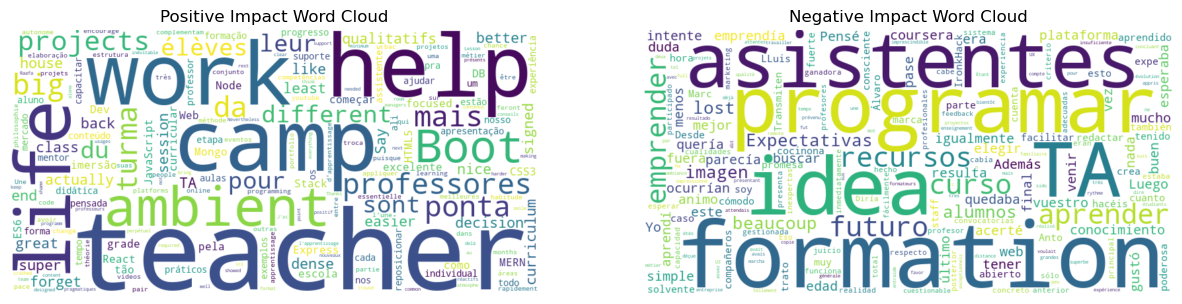

In [77]:
df = after_2016

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for each row in the specified text column
df['compound'] = df['concatenatedReviews'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Set stopwords
stop_words = set(stopwords.words('english'))
stop_words_spanish = set(stopwords.words('spanish'))

# Additional stop words to be added
additional_stop_words = [
    'experience', 'le', 'wagon', 'course', 'program', 'that', 'for', 'data', 'they', 'have', 'student',
    'one', 'if', 'time', 'me', 'so', 'at', 'your', 'were', 'we', 'really', 'be', 'what', 'after',
    'analytics', 'year', 'the', 'I', 'and', 'bootcamp', 'to', 'a', 'an', 'you', 'in', 'is', 'week', 'was',
    'of', 'this', 'it', 'with', 'have', 'from', 'are', 'but', 'all', 'my', 'on', 'as', 'very', 'not',
    'their', 'there', 'will', 'had', 'after', 'do', 'more', 'also', 'get', 'because', 'or', 'them', 'some',
    'would', 'weeks', 'can', 'did', 'where', 'just', 'don', 'about', 'out', 'only', 'read', 'less', 'learn','de','la', 'es'
    'así' 'que', 'en', 'ios', 'tengo', 'entrar','un','para', 'que', 'lo', 'tanto', 'las', 'ya', 'por', 'una', 'el', 'su', 'et',
    'sin', 'mi', 'pero', 'se', 'e', 'al', 'ni', 'été','je', 'Si', 'más', 'l', 'los', 'ce', 'esta', 'siempre', 'des', 'les',
    'todas', 'em', 'lot', 'j', 'etc','ni', 'hasta', 'vista', 'sobre', 'creo', 'com', 'iba', 'algo', 'Han', 'sabía', 'uno', 'ai',
    'pas', 'papu', 'llega', 'mismo', 'est', 'também', 'Há', 'JS', 'à', 'puse', 'avons', 'porque', 'lanzar', 'fue',
    'solo', 'ont', 'es', 'cette', 'Ironhack', 'bootcamp', 'bien', 'poder', 'tenía', 'take', 'nous', 'hacer', 'could'
    'sua', 'é', 'good', 'gave', 'cours', 'sua', 'could', 'make', 'even', 'doblado'
]


# Update stop word sets with additional words
stop_words.update(additional_stop_words)
stop_words_spanish.update(additional_stop_words)


# Generate word clouds for positive and negative impact words
positive_words = ' '.join(df[df['compound'] >= 0.05]['concatenatedReviews'].astype(str).values)
negative_words = ' '.join(df[df['compound'] <= -0.05]['concatenatedReviews'].astype(str).values)

# Generate word clouds for positive and negative impact words
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(negative_words)

# Display the word clouds using matplotlib
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Impact Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Impact Word Cloud')

plt.show()


In [78]:
# Define the names of your views
view_names = ['lewagon_avg_scores']

# Create an empty dictionary to store views' data
views_data = {}

# Fetch data from each view and store it in the dictionary
for view_name in view_names:
    query = f"SELECT * FROM {view_name}"
    cursor.execute(query)
    columns = [column[0] for column in cursor.description]
    view_data = pd.DataFrame(cursor.fetchall(), columns=columns)
    views_data[view_name] = view_data
    
lewagon= pd.DataFrame(view_data)

lewagon

,graduatingYear,school,avgOverallScore,avgOverall,avgCurriculum,avgjobSupport,concatenatedReviews
0,2011,le-wagon,5.000000,5.000000,5.000000,5.000000,When I took my ticket for Le Wagon a few years...
1,2012,le-wagon,5.000000,5.000000,5.000000,5.000000,Le Wagon Web Development Bootcamp suited my cr...
2,2014,le-wagon,4.913333,5.000000,4.923077,4.769231,After graduating from business school and laun...
3,2015,le-wagon,4.990909,5.000000,5.000000,4.900000,"★★★★★TL, DR:It changed my life. Removed the fe..."
4,2016,le-wagon,4.955914,5.000000,5.000000,4.793651,*Background* As a graduate in Entrepreneurship...
5,2017,le-wagon,4.949383,4.993827,4.981366,4.856209,- Hands down the best coding course out there!...
6,2018,le-wagon,4.946695,4.982942,4.976395,4.863962,"Before Le Wagon, I had just finished a busine..."
7,2019,le-wagon,4.936347,4.976492,4.967273,4.847490,"""An amazing experience that opened me to a new..."
8,2020,le-wagon,4.904630,4.979167,4.939815,4.781176,- what you did before Le Wagon I was/still am ...
9,2021,le-wagon,4.920833,4.990385,4.926282,4.832258,# What I did before joining Le Wagon Singapore...


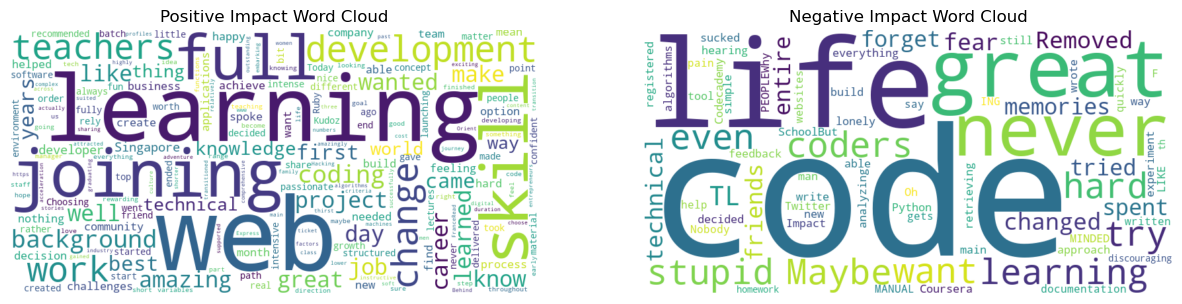

In [79]:
df = lewagon

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for each row in the specified text column
df['compound'] = df['concatenatedReviews'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Set stopwords
stop_words = set(stopwords.words('english'))
stop_words_spanish = set(stopwords.words('spanish'))

# Additional stop words to be added
additional_stop_words = [
  'experience', 'le', 'wagon', 'course', 'program', 'that', 'for', 'data', 'they', 'have', 'student',
    'one', 'if', 'time', 'me', 'so', 'at', 'your', 'were', 'we', 'really', 'be', 'what', 'after',
    'analytics', 'year', 'the', 'I', 'and', 'bootcamp', 'to', 'a', 'an', 'you', 'in', 'is', 'week', 'was',
    'of', 'this', 'it', 'with', 'have', 'from', 'are', 'but', 'all', 'my', 'on', 'as', 'very', 'not',
    'their', 'there', 'will', 'had', 'after', 'do', 'more', 'also', 'get', 'because', 'or', 'them', 'some',
    'would', 'weeks', 'can', 'did', 'where', 'just', 'don', 'about', 'out', 'only', 'read', 'less', 'learn','de','la', 'es'
    'así' 'que', 'en', 'ios', 'tengo', 'entrar','un','para', 'que', 'lo', 'tanto', 'las', 'ya', 'por', 'una', 'el', 'su', 'et',
    'sin', 'mi', 'pero', 'se', 'e', 'al', 'ni', 'été','je', 'Si', 'más', 'l', 'los', 'ce', 'esta', 'siempre', 'des', 'les',
    'todas', 'em', 'lot', 'j', 'etc','ni', 'hasta', 'vista', 'sobre', 'creo', 'com', 'iba', 'algo', 'Han', 'sabía', 'uno', 'ai',
    'pas', 'papu', 'llega', 'mismo', 'est', 'também', 'Há', 'JS', 'à', 'puse', 'avons', 'porque', 'lanzar', 'fue',
    'solo', 'ont', 'es', 'cette', 'Ironhack', 'bootcamp', 'bien', 'poder', 'tenía', 'take', 'nous', 'hacer', 'could'
    'sua', 'é', 'Dr'   
]


# Update stop word sets with additional words
stop_words.update(additional_stop_words)
stop_words_spanish.update(additional_stop_words)


# Generate word clouds for positive and negative impact words
positive_words = ' '.join(df[df['compound'] >= 0.05]['concatenatedReviews'].astype(str).values)
negative_words = ' '.join(df[df['compound'] <= -0.05]['concatenatedReviews'].astype(str).values)

# Generate word clouds for positive and negative impact words
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(negative_words)

# Display the word clouds using matplotlib
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Impact Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Impact Word Cloud')

plt.show()


In [65]:
# Close the cursor and connection
cursor.close()
cnx.close()